In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/데이터셋 초초안.CSV",encoding='euc-kr')
df

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


In [4]:
df = df[['Etching_rate','thickness','ppm','Resolution','Selectivity','RTA_Temp','Temp_OXid','Line_CD','input_Energy','Temp_Etching','Target']]

In [5]:
df

,Etching_rate,thickness,ppm,Resolution,Selectivity,RTA_Temp,Temp_OXid,Line_CD,input_Energy,Temp_Etching,Target
0,169.78300,713.132,26.69,505.388,1.030,154,1214.307948,41.676,30795.934,72.651,0
1,171.94875,714.295,30.86,541.732,1.038,156,978.110792,53.612,32135.618,70.267,0
2,167.25350,710.114,31.07,532.200,1.005,152,1176.019149,47.598,31057.895,71.231,0
3,169.45425,710.617,31.04,537.729,1.025,155,933.442733,32.843,32140.566,71.295,0
4,172.43300,711.632,31.37,522.143,1.038,155,1140.598752,57.370,31986.009,72.983,0
...,...,...,...,...,...,...,...,...,...,...,...
1699,174.44950,715.498,45.10,468.930,1.015,152,1275.182502,32.525,32248.621,71.550,0
1700,172.29475,707.179,45.07,469.586,1.011,152,1268.105427,28.001,32241.426,70.718,0
1701,174.68650,712.946,45.12,476.399,1.015,152,1279.160563,32.110,32245.574,71.295,0
1702,174.82175,711.987,45.34,476.997,1.014,152,1272.804948,35.822,32259.412,71.199,0


In [6]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 10)
train data Y size : (1192,)
test data X size : (512, 10)
test data Y size : (512,)


In [8]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.957


In [9]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.930
1,2,0.945,0.939
2,3,0.949,0.945
3,4,0.961,0.951
4,5,0.968,0.947
5,6,0.977,0.955
6,7,0.981,0.957
7,8,0.987,0.957
8,9,0.990,0.953
9,10,0.995,0.949


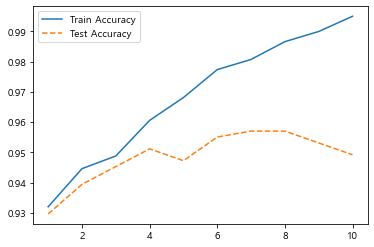

In [10]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [11]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.961,0.951
1,4,0.961,0.951
2,6,0.961,0.951
3,8,0.961,0.951
4,10,0.961,0.951
5,12,0.958,0.953
6,14,0.958,0.953
7,16,0.956,0.953
8,18,0.956,0.953
9,20,0.956,0.953


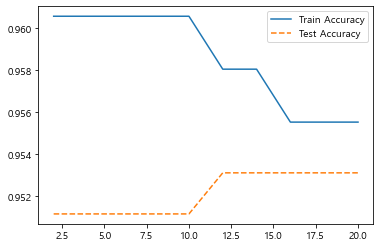

In [12]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [13]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 4, min_samples_split=11
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.957,0.953
1,4,0.954,0.947
2,6,0.951,0.947
3,8,0.950,0.947
4,10,0.950,0.947
5,12,0.946,0.947
6,14,0.946,0.947
7,16,0.945,0.939
8,18,0.945,0.939
9,20,0.945,0.939


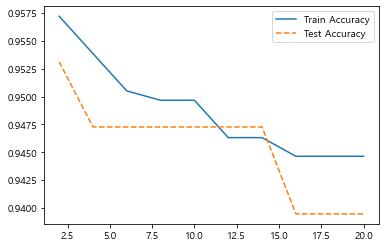

In [14]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

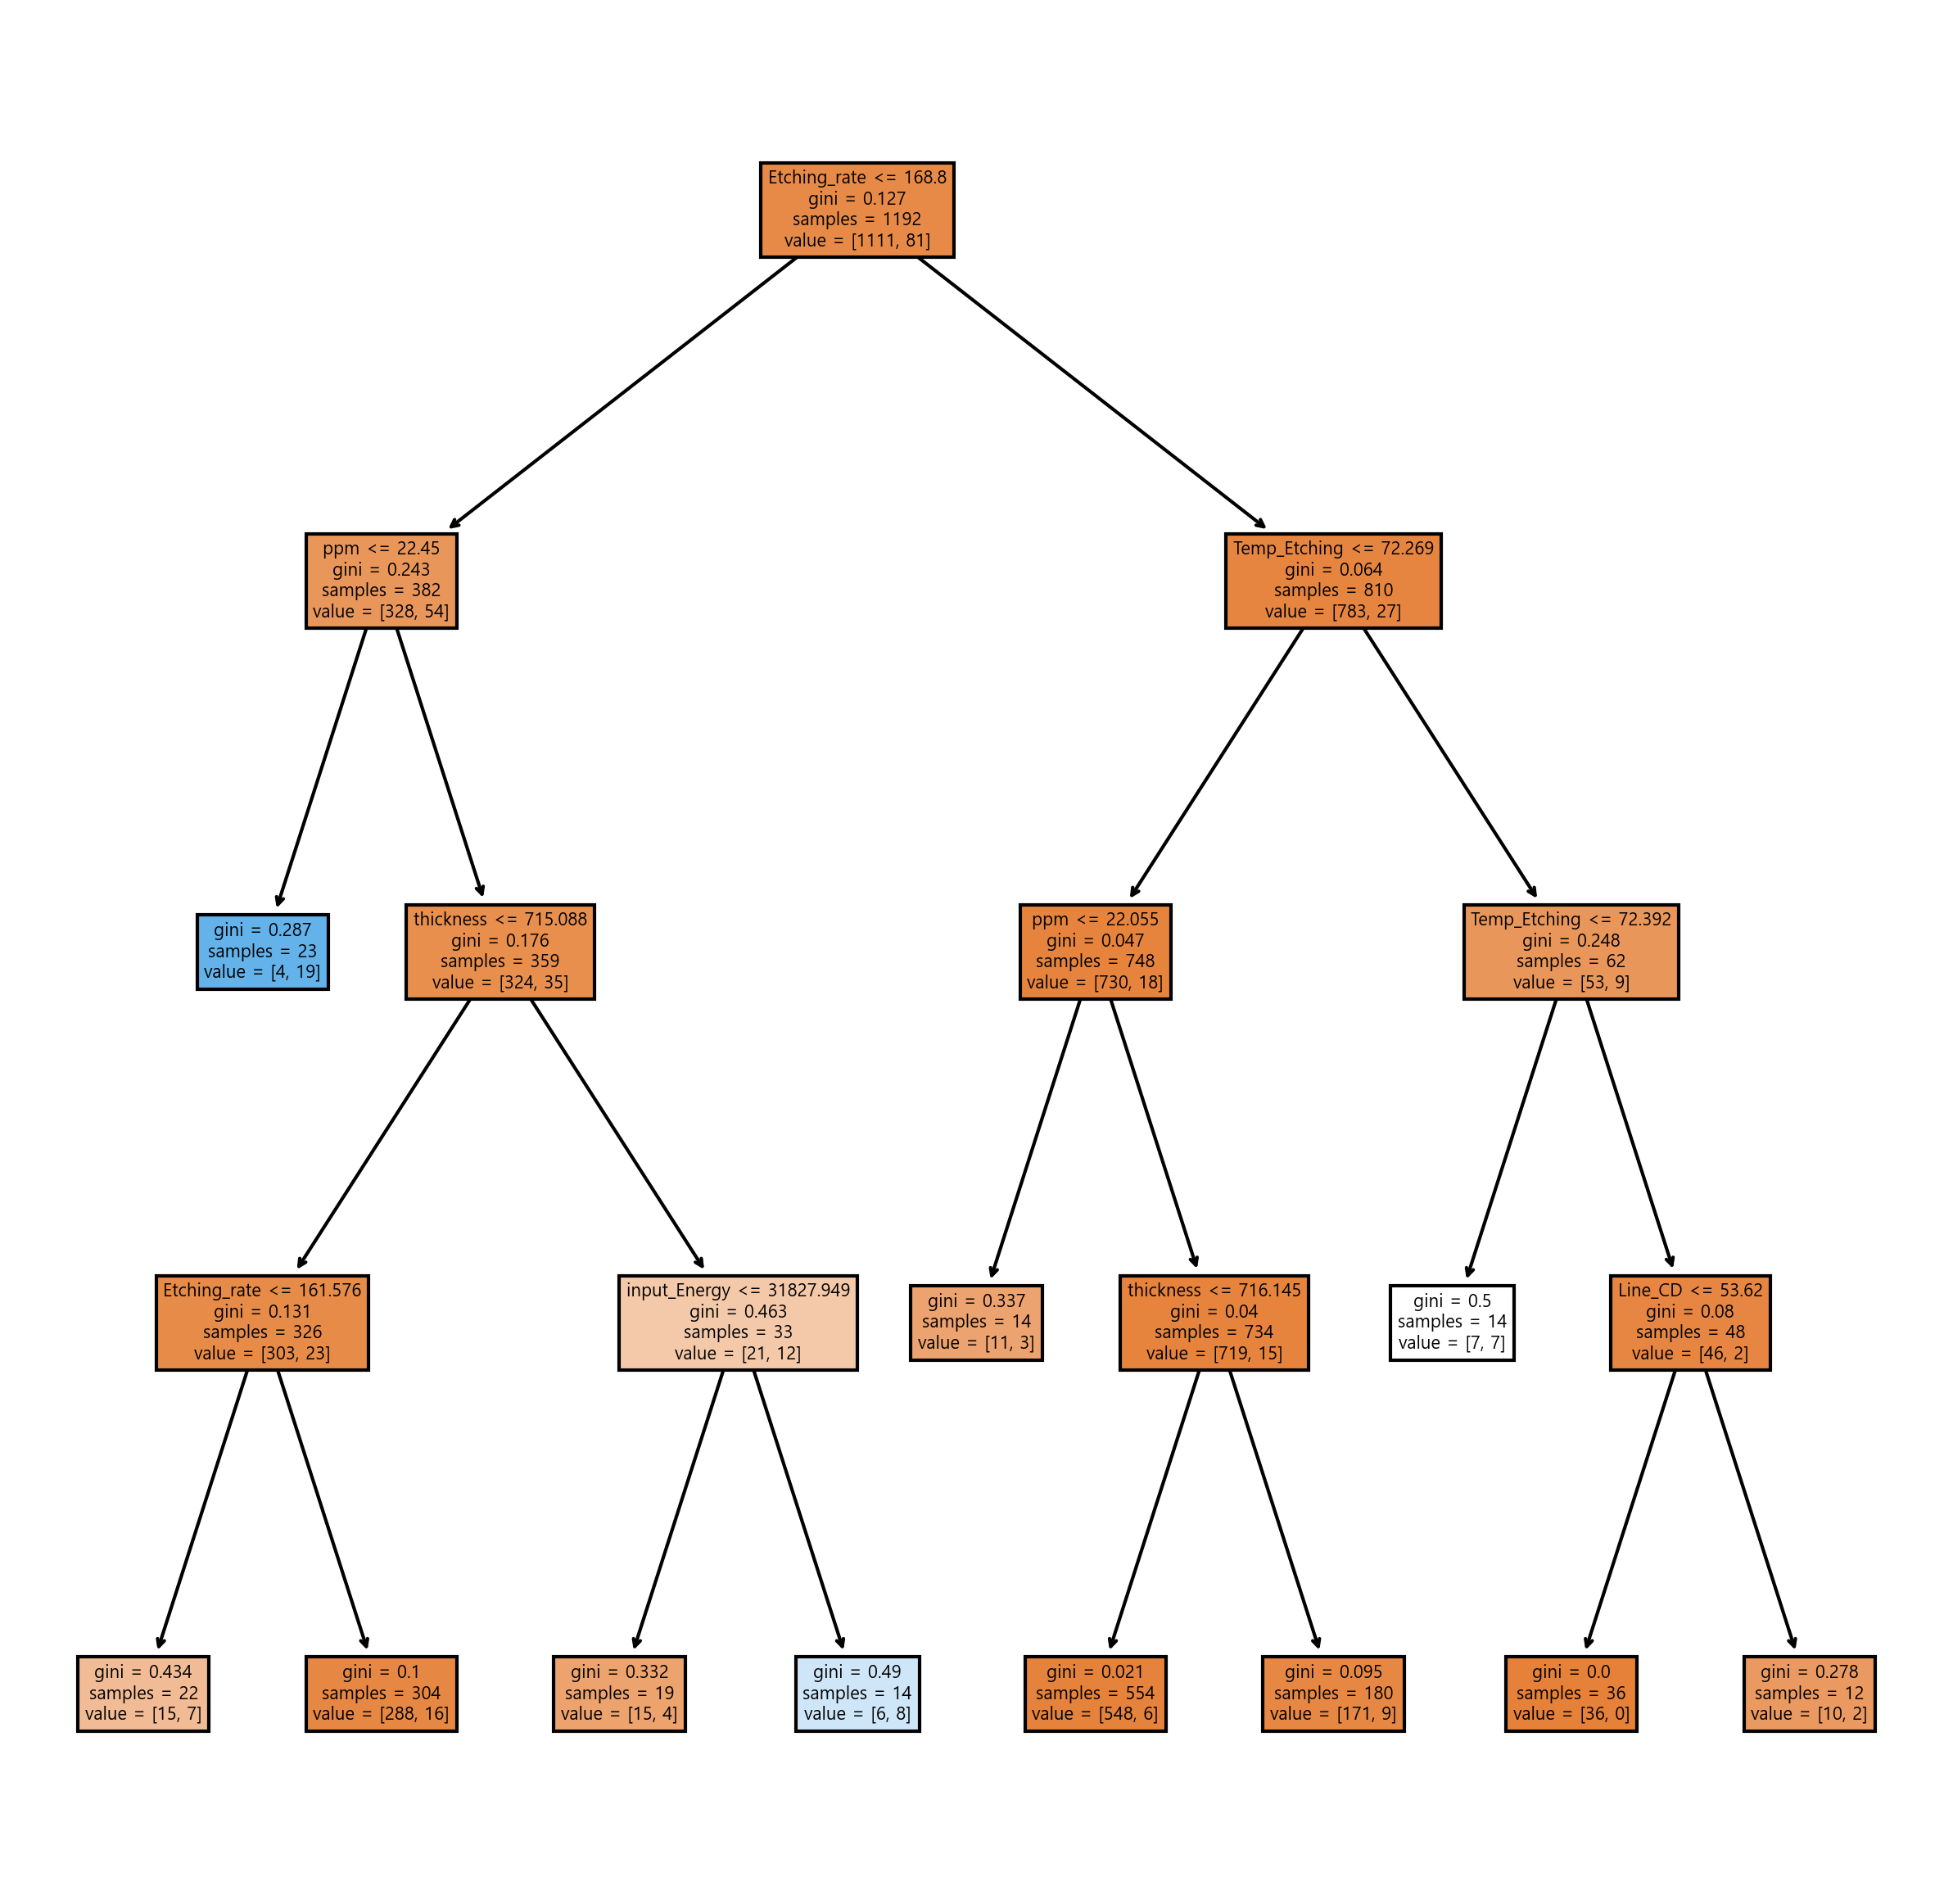

In [26]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf =12, min_samples_split = 11, max_depth = 4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

#'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 6}

In [27]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.946
Accuracy on test set : 0.947
Confusion matrix : 
[[475   1]
 [ 26  10]]
              precision    recall  f1-score   support

           0      0.948     0.998     0.972       476
           1      0.909     0.278     0.426        36

    accuracy                          0.947       512
   macro avg      0.929     0.638     0.699       512
weighted avg      0.945     0.947     0.934       512



In [28]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,ppm,0.507
0,Etching_rate,0.189
9,Temp_Etching,0.132
1,thickness,0.118
8,input_Energy,0.044
7,Line_CD,0.011
3,Resolution,0.000
4,Selectivity,0.000
5,RTA_Temp,0.000
6,Temp_OXid,0.000


Text(0, 0.5, '설명변수')

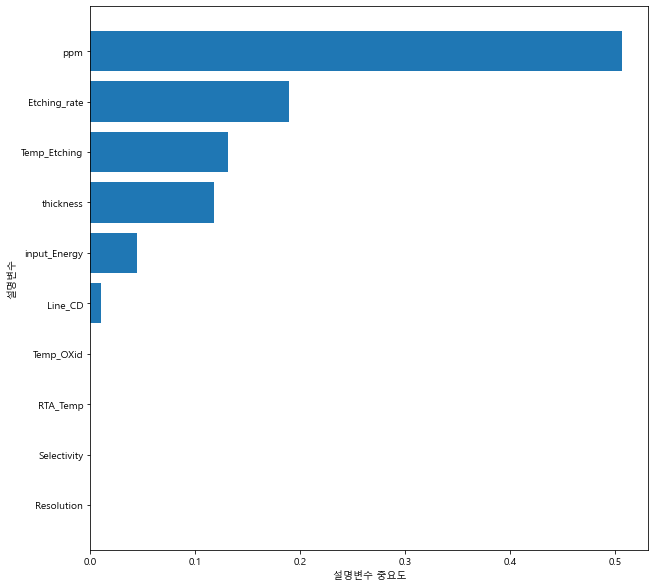

In [29]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [19]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator =DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=6)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 6}

best score: 
0.936


# RF

In [30]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.973


In [31]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.997,0.967
1,20,0.999,0.967
2,30,1.000,0.969
3,40,1.000,0.971
4,50,1.000,0.969
5,60,1.000,0.969
6,70,1.000,0.969
7,80,1.000,0.969
8,90,1.000,0.969
9,100,1.000,0.973


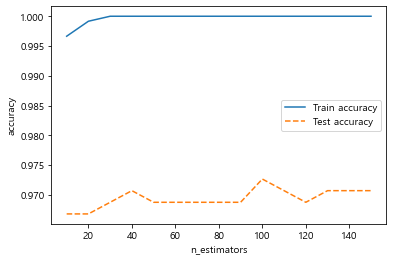

In [32]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [33]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth, n_estimators = 100)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.930
1,2,0.932,0.930
2,3,0.937,0.934
3,4,0.939,0.936
4,5,0.956,0.945
5,6,0.962,0.947
6,7,0.974,0.947
7,8,0.987,0.959
8,9,0.994,0.969
9,10,0.997,0.969


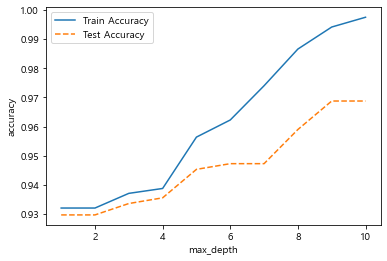

In [34]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [35]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 5, n_estimators = 100
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.951,0.939
1,20,0.945,0.938
2,30,0.938,0.938
3,40,0.937,0.936
4,50,0.936,0.934
5,60,0.936,0.934
6,70,0.935,0.934
7,80,0.933,0.930
8,90,0.933,0.930
9,100,0.933,0.930


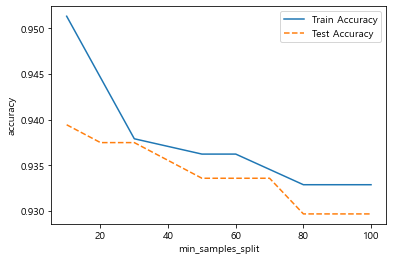

In [36]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

In [37]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 5, min_samples_split=30,n_estimators = 100
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,1,0.938,0.938
1,2,0.938,0.938
2,3,0.938,0.938
3,4,0.938,0.938
4,5,0.938,0.936
5,6,0.937,0.936
6,7,0.937,0.936
7,8,0.936,0.936
8,9,0.937,0.936
9,10,0.937,0.936


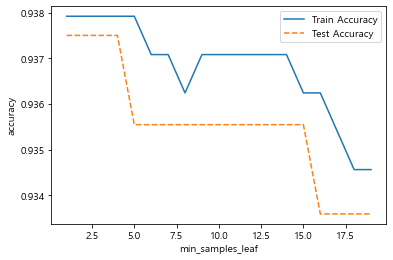

In [38]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [39]:
rf_final = RandomForestClassifier(min_samples_leaf = 4, min_samples_split = 30, max_depth = 5, random_state=1234,
                                n_estimators =100)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.938
Accuracy on test set : 0.938
Confusion matrix : 
[[476   0]
 [ 32   4]]
              precision    recall  f1-score   support

           0      0.937     1.000     0.967       476
           1      1.000     0.111     0.200        36

    accuracy                          0.938       512
   macro avg      0.969     0.556     0.584       512
weighted avg      0.941     0.938     0.914       512



In [40]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,Etching_rate,0.227
6,Temp_OXid,0.200
1,thickness,0.141
2,ppm,0.104
7,Line_CD,0.086
9,Temp_Etching,0.069
8,input_Energy,0.063
4,Selectivity,0.044
3,Resolution,0.040
5,RTA_Temp,0.028


Text(0, 0.5, '설명변수')

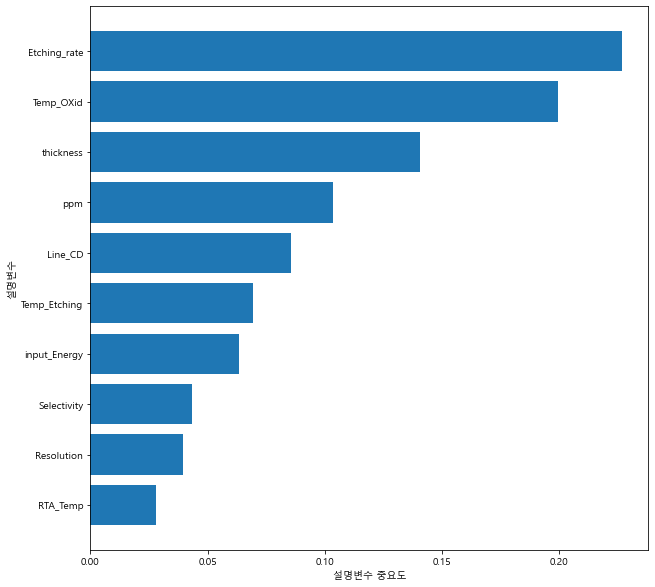

In [41]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# GB

In [42]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.995
Accuracy on test set : 0.969


In [43]:
train_accuracy = [] 
test_accuracy = []
# 학습률 변경에 따른 모델 성능
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["Trainaccuracy"] = train_accuracy
df_accuracy_lr["Testaccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,0.995,0.969
1,0.2,0.999,0.971
2,0.3,1.000,0.973
3,0.4,1.000,0.969
4,0.5,1.000,0.969
5,0.6,1.000,0.965
6,0.7,1.000,0.957
7,0.8,1.000,0.961
8,0.9,1.000,0.955
9,1.0,0.986,0.951


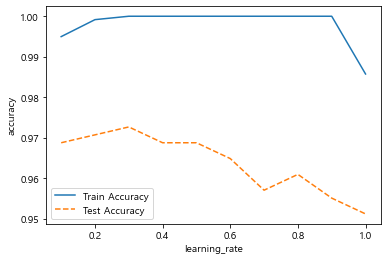

In [44]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

In [45]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators =v_n_estimators, learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.976,0.941
1,20,0.988,0.957
2,30,0.997,0.961
3,40,0.998,0.965
4,50,0.999,0.965
5,60,0.999,0.969
6,70,1.000,0.971
7,80,1.000,0.973
8,90,1.000,0.973
9,100,1.000,0.973


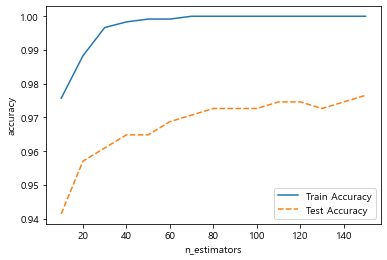

In [46]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [47]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 150,learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.959,0.941
1,2,0.999,0.965
2,3,1.000,0.977
3,4,1.000,0.973
4,5,1.000,0.977
5,6,1.000,0.975
6,7,1.000,0.975
7,8,1.000,0.977
8,9,1.000,0.943
9,10,1.000,0.963


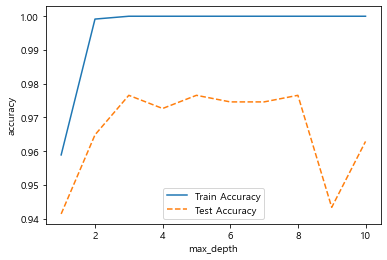

In [48]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [49]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = 3, n_estimators = 150,learning_rate = 0.3
                                 , min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.971
1,20,1.0,0.973
2,30,1.0,0.969
3,40,1.0,0.975
4,50,1.0,0.975
5,60,1.0,0.969
6,70,1.0,0.967
7,80,1.0,0.969
8,90,1.0,0.971
9,100,1.0,0.967


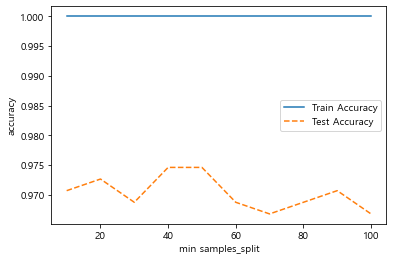

In [50]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples_split')
plt.legend()

In [51]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, max_depth = 3, min_samples_split=50,n_estimators = 150
                                , learning_rate = 0.3,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,1.0,0.975
1,20,1.0,0.969
2,30,1.0,0.979
3,40,1.0,0.975
4,50,1.0,0.973
5,60,1.0,0.971
6,70,1.0,0.971
7,80,1.0,0.969
8,90,1.0,0.967
9,100,1.0,0.961


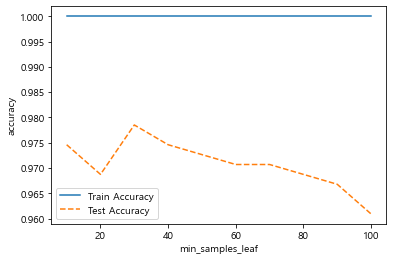

In [52]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [53]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 30, min_samples_split = 50, max_depth = 3, random_state=1234,
                               learning_rate = 0.3, n_estimators =150)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 1.000
Accuracy on test set : 0.979
Confusion matrix : 
[[473   3]
 [  8  28]]
              precision    recall  f1-score   support

           0      0.983     0.994     0.989       476
           1      0.903     0.778     0.836        36

    accuracy                          0.979       512
   macro avg      0.943     0.886     0.912       512
weighted avg      0.978     0.979     0.978       512



In [54]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,thickness,0.257
0,Etching_rate,0.237
2,ppm,0.162
8,input_Energy,0.066
6,Temp_OXid,0.065
3,Resolution,0.060
7,Line_CD,0.056
9,Temp_Etching,0.038
5,RTA_Temp,0.033
4,Selectivity,0.026


Text(0, 0.5, '설명변수')

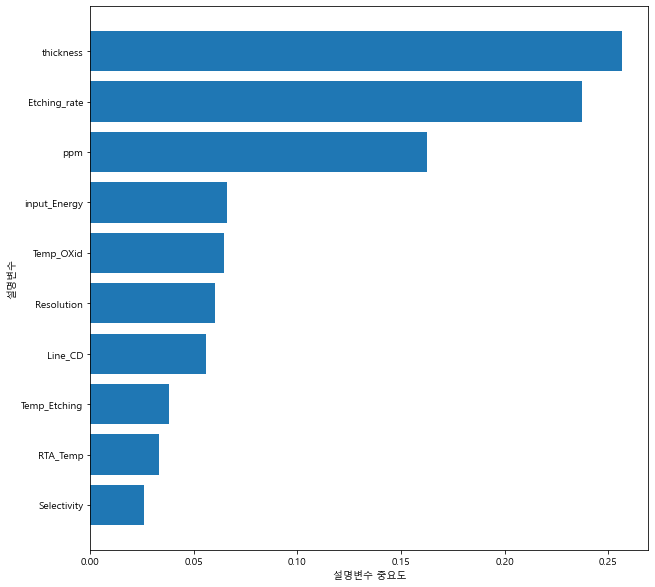

In [55]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")